### Data import and libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn import tree # for text representation
from matplotlib import pyplot as plt

import dtreeviz
from supertree import SuperTree
# import graphviz

C:\Users\cz263marroso\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\cz263marroso\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# segmentation = pd.read_sas("data_for_segmentation_st.sas7bdat")
df = pd.read_sas("data_for_segmentation_wi.sas7bdat")

### Bytes to strings

In [3]:
imputer = SimpleImputer(strategy='most_frequent')
df_imp = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [4]:
label_encoders = {}
for column in df_imp.columns:
    if df_imp[column].dtype == 'object':
        le = LabelEncoder()
        df_imp[column] = le.fit_transform(df_imp[column])
        label_encoders[column] = le

# Define the dependent variable and the independent variables


In [5]:
# segmentation_st = segmentation_st.drop(["cbsmessageid","Exclusion"],axis=1)
df_imp = df_imp.drop(["cbsmessageid","Exclusion"], axis = 1)

### Train test split

In [6]:
X = df_imp.drop('performance', axis = 1)
y = df_imp['performance']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

### Chaid

In [8]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42, min_samples_leaf = 5_000)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5000,
                       random_state=42)

### Visualization

In [9]:
# https://mljar.com/blog/visualize-decision-tree/

##### Text representation

In [10]:
text_representation = tree.export_text(clf,
                                       feature_names = list(clf.feature_names_in_),
                                       show_weights = True)
print(text_representation)

# with open("decistion_tree.log", "w") as fout:
#     fout.write(text_representation)

|--- C_750100 <= 1.50
|   |--- C_111500 <= 0.50
|   |   |--- C_111300 <= 4.50
|   |   |   |--- weights: [7622.00, 267235.00] class: 1
|   |   |--- C_111300 >  4.50
|   |   |   |--- weights: [1162.00, 7391.00] class: 1
|   |--- C_111500 >  0.50
|   |   |--- C_111640 <= 0.50
|   |   |   |--- weights: [2252.00, 18881.00] class: 1
|   |   |--- C_111640 >  0.50
|   |   |   |--- weights: [2051.00, 6972.00] class: 1
|--- C_750100 >  1.50
|   |--- weights: [5513.00, 1101.00] class: 0



#### Tree plot

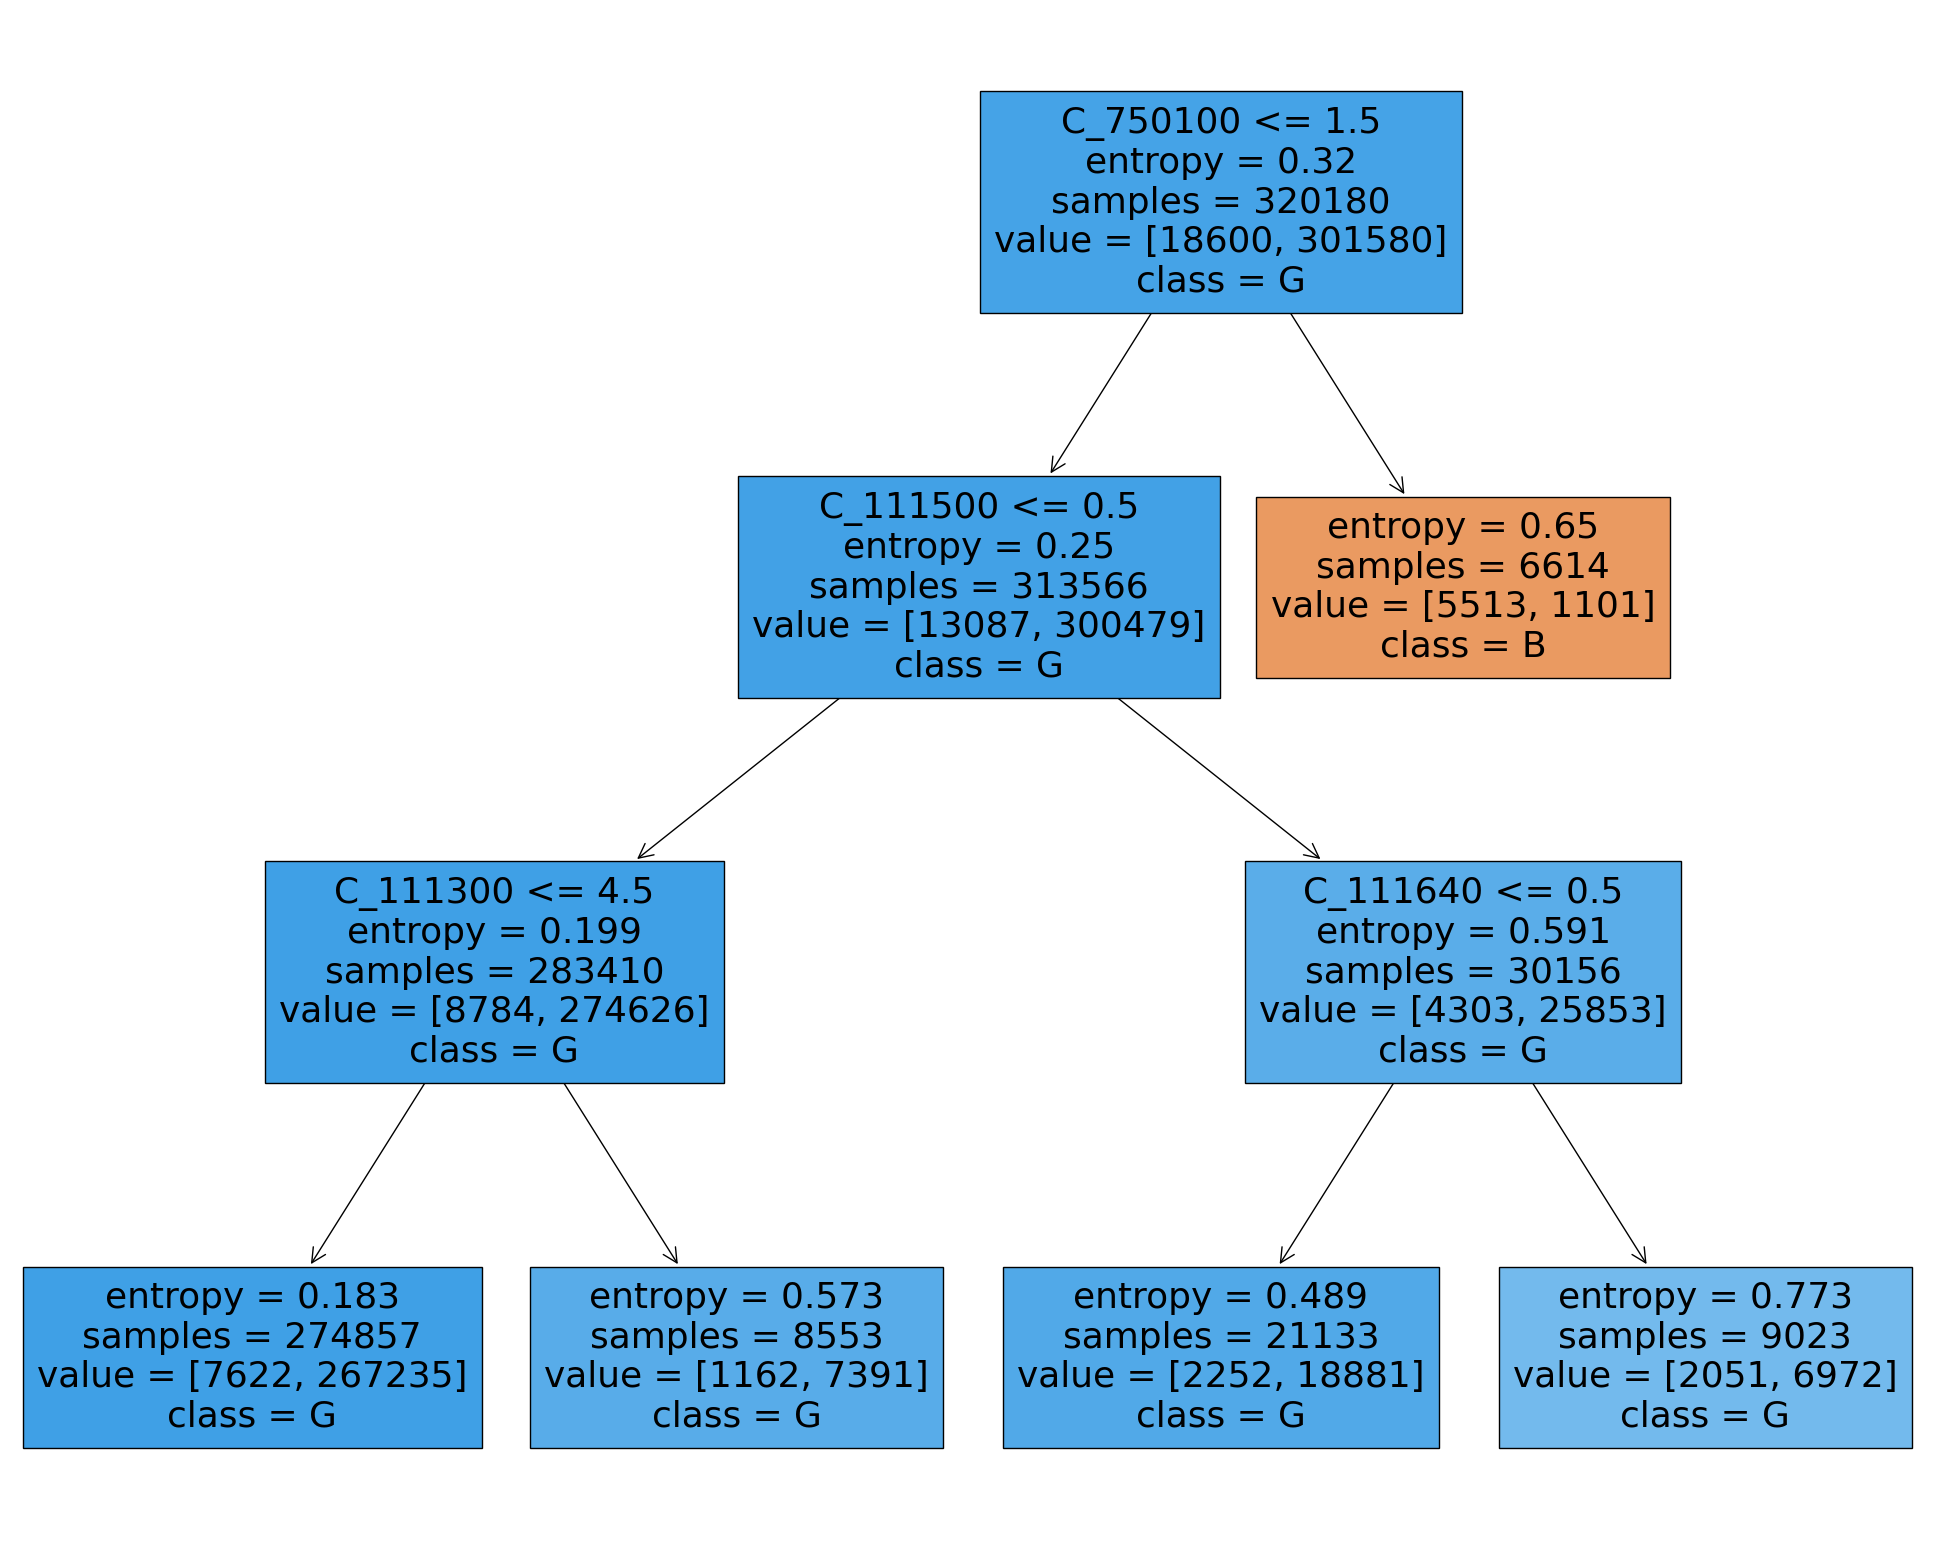

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = list(clf.feature_names_in_),
                   class_names = ["B","G"],
                   filled = True)

# fig.savefig("decistion_tree.png")

#### Dtreeviz

In [12]:
viz = dtreeviz.model(clf, X_train, y_train,
                    target_name = "performance",
                    feature_names = list(clf.feature_names_in_),
                    class_names = ["B","G"])

# In a notebook, you can render inline without calling show()
# viz.view(scale=1.4) 

# Uncomment to save with scale 1
vizRender = viz.view(scale=1)
vizRender.save("play_tennis_decision_tree.svg")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

#### SuperTree

In [ ]:
# # Supertree
# # Initialize supertree
# super_tree = SuperTree(clf, 
#                        X_train, 
#                        y_train,
#                        feature_names = list(clf.feature_names_in_), 
#                        target_names = ["B","G"])

#### Graphviz

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, 
                                out_file = None,
                                feature_names = list(clf.feature_names_in_),
                                class_names = ["B","G"],
                                filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
X.columns

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = list(label_encoders['performance'].classes_),
                   class_names = X.columns,
                   filled = True)

In [ ]:
viz = dtreeviz.model(clf, X_train, y_train,
                     target_name = 'performance',
                     feature_names = X.columns,
                     class_names = list(label_encoders['performance'].classes_))

# Save and display the tree visualization
# viz.save("decision_tree.svg")
viz.view()